In [24]:
import keras
from keras.datasets import imdb

In [25]:
import numpy as np

In [26]:
(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=12000)

In [27]:
#x_test.shape
#backup labels, so we can verify our networks prediction after vectorization
xtrain = x_train
xtest = x_test

In [28]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [29]:
def decode_review(n, split= 'train'):
    if split=='train':
        decoded_review=' '.join([reverse_word_index.get(i-3,'?')for i in 
                       xtrain[n]])
    elif split=='test':
        decoded_review=' '.join([reverse_word_index.get(i-3,'?')for i in   
                       xtest[n]])
    return decoded_review

In [30]:
print(y_train[13])
print(decode_review(10))

0
? french horror cinema has seen something of a revival over the last couple of years with great films such as inside and ? romance bursting on to the scene ? preceded the revival just slightly but stands head and shoulders over most modern horror titles and is surely one of the best french horror films ever made ? was obviously shot on a low budget but this is made up for in far more ways than one by the originality of the film and this in turn is ? by the excellent writing and acting that ensure the film is a winner the plot focuses on two main ideas prison and black magic the central character is a man named ? sent to prison for fraud he is put in a cell with three others the quietly insane ? body building transvestite marcus and his retarded boyfriend daisy after a short while in the cell together they stumble upon a hiding place in the wall that contains an old ? after ? part of it they soon realise its magical powers and realise they may be able to use it to break through the pr

In [31]:
reverse_word_index[259]

'especially'

In [32]:
def vectorize_features(features):
    dimension=12000
    review_vectors=np.zeros((len(features),dimension))
    for location, feature in enumerate(features):
        review_vectors[location, feature] =1
    return review_vectors

In [33]:
x_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 10311,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,


In [34]:
x_train = vectorize_features(x_train)
x_test = vectorize_features(x_test)

In [35]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [36]:
type(x_train),x_train.shape, y_train.shape

(numpy.ndarray, (25000, 12000), (25000,))

In [41]:
print(type(y_train[0]))
print(y_train[0])

<class 'numpy.int64'>
1


In [43]:
y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

In [45]:
y_train[0]

1.0

In [85]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(6,activation='relu',input_shape=(12000,)))
model.add(Dense(6,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [86]:
x_train.shape

(25000, 12000)

In [87]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [88]:
# network_metadata= model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=20,batch_size=100)

In [89]:
# y_test.shape

In [90]:
# network_metadata.history['accuracy']

In [91]:
early_stopping = keras.callbacks.EarlyStopping(monitor='loss')

In [92]:
network_metadata = model.fit(x_train, y_train, validation_data=(x_test,y_test),epochs=20,batch_size=100,callbacks=[early_stopping])

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 131us/step - loss: 0.4026 - accuracy: 0.8490 - val_loss: 0.3067 - val_accuracy: 0.8783
Epoch 2/20
25000/25000 [==============================] - 3s 118us/step - loss: 0.2228 - accuracy: 0.9192 - val_loss: 0.2769 - val_accuracy: 0.8894
Epoch 3/20
25000/25000 [==============================] - 3s 117us/step - loss: 0.1766 - accuracy: 0.9353 - val_loss: 0.2933 - val_accuracy: 0.8844
Epoch 4/20
25000/25000 [==============================] - 3s 117us/step - loss: 0.1499 - accuracy: 0.9462 - val_loss: 0.3216 - val_accuracy: 0.8781
Epoch 5/20
25000/25000 [==============================] - 3s 129us/step - loss: 0.1303 - accuracy: 0.9544 - val_loss: 0.3465 - val_accuracy: 0.8748
Epoch 6/20
25000/25000 [==============================] - 3s 118us/step - loss: 0.1155 - accuracy: 0.9594 - val_loss: 0.3740 - val_accuracy: 0.8697
Epoch 7/20
25000/25000 [==============================] - 3s 1

In [93]:
history_dict = network_metadata.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [94]:
import matplotlib.pyplot as plt

In [95]:
acc = history_dict['accuracy']
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
val_accuracy_values = history_dict['val_accuracy']

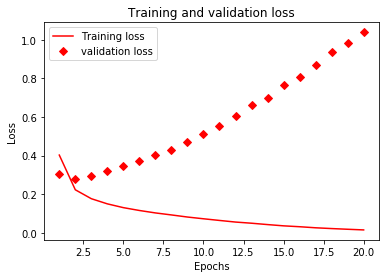

In [96]:
epochs=range(1,len(acc)+1)
plt.plot(epochs, loss_values,'r',label='Training loss')
plt.plot(epochs, val_loss_values,'rD',label='validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

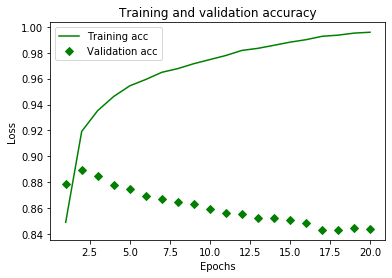

In [97]:
plt.clf()
acc_values=history_dict['accuracy']
val_acc_values=history_dict['val_accuracy']
plt.plot(epochs, history_dict.get('accuracy'),'g',label='Training acc')
plt.plot(epochs, history_dict.get('val_accuracy'),'gD',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()